In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import math
import pandas as pd
import os

In [2]:
def F1_score_total_classes(data_name, n_class, monitored_layers, taus_tried, taus_selected, storage_folder):
    classes = range(n_class)
    columns = ["tau", "TN", "FP", "MN", "FN", "TP", "MP"]
    for layer in monitored_layers:
        filename_prefix = storage_folder + str(layer) + "/monitor_performance_class_"
        F1_scores = []
        
        for tau in taus_tried:
            df1 = pd.DataFrame(columns=columns)
            for i in classes:
                filename = filename_prefix + str(i) + ".csv"
                data = pd.read_csv(filename)
                row = data.loc[data["tau"] == tau]
                df1 = df1.append(row)
            
            TP1 = df1["TP"].sum()
            FP1 = df1["FP"].sum()
            MP1 = df1["MP"].sum()
            FN1 = df1["FN"].sum()
            TN1 = df1["TN"].sum()
            MN1 = df1["MN"].sum()
            print(tau, TN1, FN1, MN1, TP1, FP1, MP1)
            

            F1_score = 2*TP1 / (2*TP1 + FP1 + MP1 + FN1)
            F1_scores.append(F1_score)
        
        print(F1_scores[0])
        
        df2 = pd.DataFrame(columns=columns)
        for output_class, tau in taus_selected.items():
            filename = filename_prefix + output_class + ".csv"
            data = pd.read_csv(filename)
            row = data.loc[data["tau"] == tau]
            df2 = df2.append(row)
        
        TP2 = df2["TP"].sum()
        FP2 = df2["FP"].sum()
        MP2 = df2["MP"].sum()
        FN2 = df2["FN"].sum()
        F1_score_2 = 2*TP2 / (2*TP2 + FP2 + MP2 + FN2)
        
        print(F1_score_2)
        
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.hlines(y=F1_score_2, xmin=0.0, xmax=1.0, label = "combined_parameter", color='r')
        ax1.plot(taus_tried, F1_scores, label = "uniform_parameter", color='black', marker='x')
        ax1.set_xlabel(r'clustering parameter $\tau$')
        ax1.set_ylabel('F1 score')
        ax1.set_title("MNIST_layer_" + str(layer) + "_F1_scores")
        ax1.legend()
        fig_storage_name = storage_folder + str(layer) + "/" + "F1_scores.pdf"
        plt.savefig(fig_storage_name)
        plt.show()
        plt.close()

In [3]:
def F1_scores_instance_0_MNIST():
    data_name = "MNIST"
    n_class = 10
    monitored_layers = [6, 7, 8, 9]
    taus_tried = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    taus_selected = {"0" : 0.05, "1" : 0.01, "2" : 0.01, "3" : 0.01, "4" : 0.01, "5" : 0.1, "6" : 0.1, "7" : 0.05, "8" : 0.05, "9" : 0.2} 
    storage_folder = "./models/MNIST/Monitor_evaluation/test_results/Layer_"
    F1_score_total_classes(data_name, n_class, monitored_layers, taus_tried, taus_selected, storage_folder)

0.01 8131 2623 0 7523 1721 2
0.05 9348 4557 6 5571 498 20
0.1 9476 4329 67 4960 309 859
0.2 9230 4282 377 4751 245 1115
0.3 9158 4068 494 4743 200 1337
0.4 9035 3500 628 4711 189 1937
0.5 9035 3373 628 4711 189 2064
0.6 9035 3373 628 4711 189 2064
0.7 9035 3373 628 4711 189 2064
0.8 9035 3373 628 4711 189 2064
0.9 9035 3373 628 4711 189 2064
1.0 9035 3373 628 4711 189 2064
0.7758869636963697
0.7929644957525593


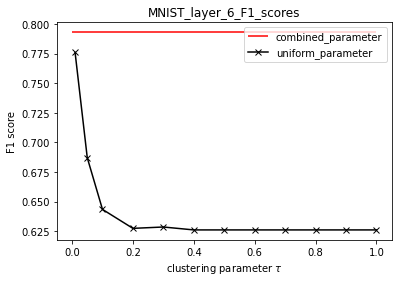

0.01 8536 1735 0 8413 1316 0
0.05 9507 2998 4 7147 341 3
0.1 9606 3138 39 6937 207 73
0.2 9300 2194 397 6935 155 1019
0.3 9241 2207 481 6920 130 1021
0.4 8922 1897 807 6920 123 1331
0.5 8945 1890 819 6919 88 1339
0.6 8945 1890 819 6919 88 1339
0.7 8945 1890 819 6919 88 1339
0.8 8945 1890 819 6919 88 1339
0.9 8945 1890 819 6919 88 1339
1.0 8945 1890 819 6919 88 1339
0.8465060119736378
0.8500372776653531


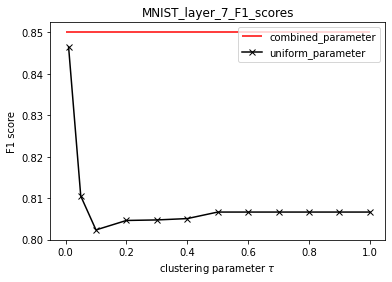

0.01 8935 1789 0 8359 917 0
0.05 9576 2961 11 7185 265 2
0.1 9646 2911 40 7144 166 93
0.2 9450 1850 261 7115 141 1183
0.3 8708 1734 1029 7108 115 1306
0.4 8461 1659 1286 7108 105 1381
0.5 8340 1634 1430 7107 82 1407
0.6 8349 1635 1430 7106 73 1407
0.7 8349 1635 1430 7106 73 1407
0.8 8349 1635 1430 7106 73 1407
0.9 8349 1635 1430 7106 73 1407
1.0 8349 1635 1430 7106 73 1407
0.8606878088962109
0.8726134917267713


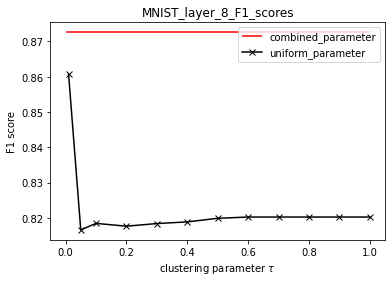

0.01 9372 288 0 9860 480 0
0.05 9617 1004 0 9144 235 0
0.1 9695 1732 1 8415 156 1
0.2 9762 2915 5 7185 85 48
0.3 9766 2869 13 6942 73 337
0.4 9776 3387 14 6422 62 339
0.5 9771 3118 19 6422 62 608
0.6 9775 3128 19 6412 58 608
0.7 9793 3188 19 6339 40 621
0.8 9793 3188 19 6339 40 621
0.9 9793 3188 19 6339 40 621
1.0 9793 3188 19 6339 40 621
0.9625146427176884
0.9681061806656102


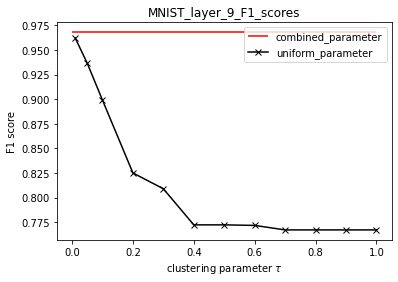

In [4]:
# instance 1: MNIST
F1_scores_instance_0_MNIST()